In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets,layers,models
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()


x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0


y_train = y_train.reshape(-1,)
y_test  = y_test.reshape(-1,)


x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print("Train shape:", x_train.shape, y_train.shape)
print("Val shape:", x_val.shape, y_val.shape)
print("Test shape:", x_test.shape, y_test.shape)


Train shape: (40000, 32, 32, 3) (40000,)
Val shape: (10000, 32, 32, 3) (10000,)
Test shape: (10000, 32, 32, 3) (10000,)


In [4]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)
datagen.fit(x_train)

In [5]:
from tensorflow.keras import layers, models

model = models.Sequential([
    # Block 1
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.3),

    # Block 2
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.4),

    # Block 3
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.5),

    # Transition to Dense
    layers.GlobalAveragePooling2D(),

    # Fully Connected
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    # Output
    layers.Dense(10, activation='softmax')
])


In [6]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [7]:
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=10,
    verbose=1,
    min_lr=1e-6
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [8]:
model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=25,
    batch_size=64,
    validation_data=(x_val, y_val),
    verbose=1
)


Epoch 1/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 101s 153ms/step - accuracy: 0.2356 - loss: 2.4312 - val_accuracy: 0.2037 - val_loss: 2.4703
Epoch 2/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 99s 158ms/step - accuracy: 0.3094 - loss: 1.9978 - val_accuracy: 0.2951 - val_loss: 2.2525
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 103s 165ms/step - accuracy: 0.3545 - loss: 1.8159 - val_accuracy: 0.3121 - val_loss: 2.2347
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 95s 151ms/step - accuracy: 0.3974 - loss: 1.6913 - val_accuracy: 0.3261 - val_loss: 2.0686
Epoch 5/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 95s 152ms/step - accuracy: 0.4297 - loss: 1.5913 - val_accuracy: 0.3740 - val_loss: 1.9308
Epoch 6/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 102s 164ms/step - accuracy: 0.4618 - loss: 1.4981 - val_accuracy: 0.3779 - val_loss: 1.8980
Epoch 7/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 96s 153ms/step - accuracy: 0.4877 - loss: 1.4284 - val_accuracy: 0.4515 - val_loss: 1.6948
Epoch 8/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 97s 155ms/step - accuracy: 0.5136 - loss

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"✅ Test accuracy: {test_acc:.4f}")


313/313 - 4s - 14ms/step - accuracy: 0.6729 - loss: 0.9422
✅ Test accuracy: 0.6729


In [12]:
y_pred = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


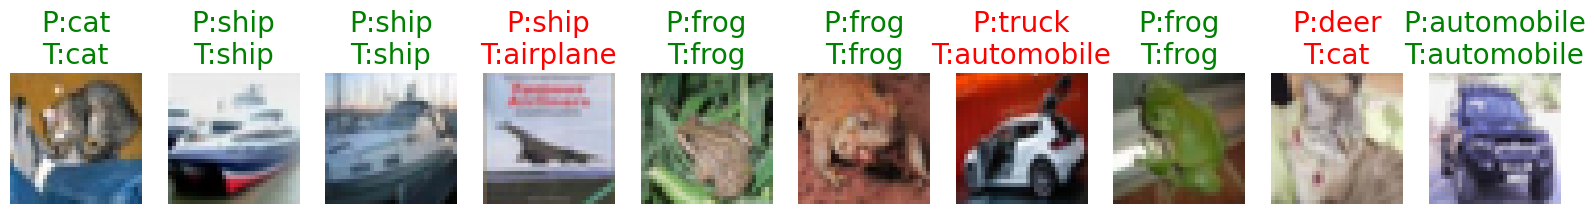

In [38]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(20, 50))

for i in range(10):
    plt.subplot(1, 10, i+1)  
    plt.imshow(x_test[i])
    plt.axis("off")

    
    pred = class_names[y_pred_classes[i]]
    true = class_names[y_true[i]]

    
    color = "green" if pred == true else "red"
    plt.title(f"P:{pred}\nT:{true}", color=color, fontsize=20)

plt.show()
